In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

from netam import framework

In [5]:
pcp_df = pd.read_csv("~/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv")
crepe_prefix = "../train/trained_models/cnn_joi_lrg-shmoof_small-fixed-0"

assert framework.crepe_exists(crepe_prefix)
crepe = framework.load_crepe(crepe_prefix)

seqs = pcp_df.loc[1000:1002, "parent"]
rates, csp_logits = crepe(seqs)
csps = torch.softmax(csp_logits[0], dim=1)

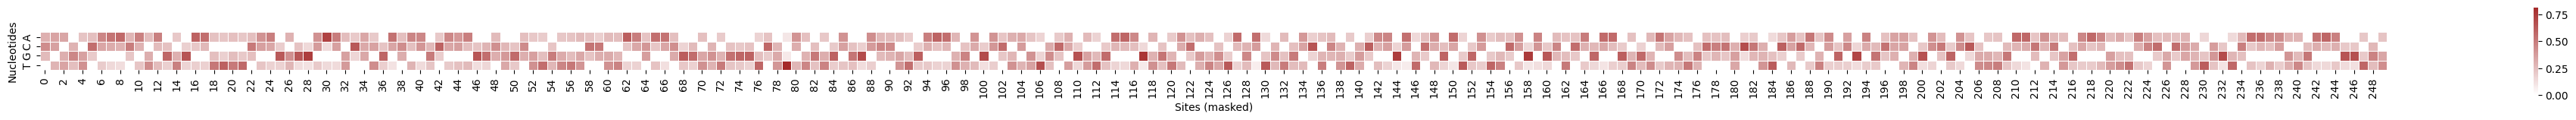

In [13]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("not_viridis", ["white", "brown"])

# Create a DataFrame from the numpy array
df_csps = pd.DataFrame(csps[100:350].T, index=["A", "C", "G", "T"])


# Create the heatmap
plt.figure(figsize=(50, 3))
sns.heatmap(df_csps, annot=False, cmap=cmap, linewidths=.5, square=True, cbar_kws={"shrink": .5})

# Setting labels
plt.xlabel("Sites (masked)")
plt.ylabel("Nucleotides")

# Show the plot
plt.show()


<Axes: >

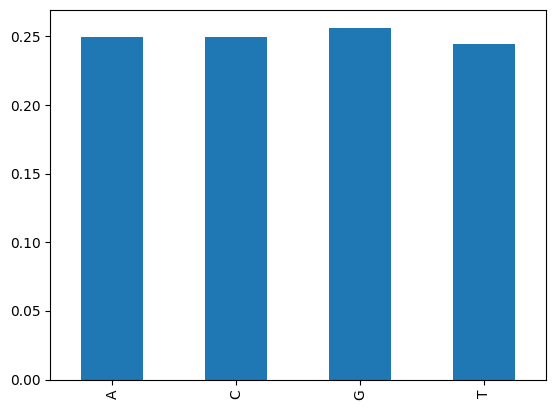

In [14]:
pd.Series(csps[100:350].mean(axis=0), index=["A", "C", "G", "T"]).plot(kind="bar")